In [27]:
import torch
from torch.nn import Linear
import matplotlib.pyplot as plt

In [4]:
w = torch.tensor(2.0, requires_grad= True)
b = torch.tensor(1.0, requires_grad= True)

def forward(x):
    y = w*x + b
    return y

x = torch.tensor([1.0])
yhat= forward(x)

In [5]:
yhat

tensor([3.], grad_fn=<AddBackward0>)

In [6]:
x = torch.tensor([[1],[2]])
yhat= forward(x)
yhat

tensor([[3.],
        [5.]], grad_fn=<AddBackward0>)

In [15]:
from torch.nn import Linear
torch.manual_seed(1)
model = Linear(in_features=1, out_features=1)
print(list(model.parameters()))
x = torch.tensor([0.0])
yhat= model(x)

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


In [16]:
yhat

tensor([-0.4414], grad_fn=<ViewBackward0>)

In [18]:
from torch import nn

In [19]:
# Customize Linear Regression Class

class LR(nn.Module):
    
    # Constructor
    def __init__(self, input_size, output_size):
        
        # Inherit from parent
        super(LR, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    # Prediction function
    def forward(self, x):
        out = self.linear(x)
        return out

In [20]:
# Create the linear regression model. Print out the parameters.

lr = LR(1, 1)
print("The parameters: ", list(lr.parameters()))
print("Linear model: ", lr.linear)

The parameters:  [Parameter containing:
tensor([[-0.1939]], requires_grad=True), Parameter containing:
tensor([0.4694], requires_grad=True)]
Linear model:  Linear(in_features=1, out_features=1, bias=True)


In [21]:
# Try our customize linear regression model with single input

x = torch.tensor([[1.0]])
yhat = lr(x)
print("The prediction: ", yhat)

The prediction:  tensor([[0.2755]], grad_fn=<AddmmBackward0>)


In [22]:
# Try our customize linear regression model with multiple input

x = torch.tensor([[1.0], [2.0]])
yhat = lr(x)
print("The prediction: ", yhat)

The prediction:  tensor([[0.2755],
        [0.0816]], grad_fn=<AddmmBackward0>)


In [23]:
print("Python dictionary: ", lr.state_dict())
print("keys: ",lr.state_dict().keys())
print("values: ",lr.state_dict().values())


Python dictionary:  OrderedDict([('linear.weight', tensor([[-0.1939]])), ('linear.bias', tensor([0.4694]))])
keys:  odict_keys(['linear.weight', 'linear.bias'])
values:  odict_values([tensor([[-0.1939]]), tensor([0.4694])])


In [25]:
# Practice: Use the LR class to create a model and make a prediction of the following tensor.

x = torch.tensor([[1.0], [2.0], [3.0]])

In [26]:
X = torch.arange(-3, 3, 0.1).view(-1, 1)
f = -3 * X

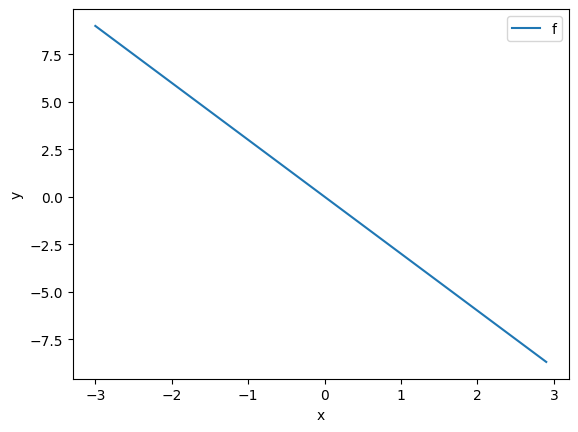

In [28]:
plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [29]:
Y = f + 0.1 * torch.randn(X.size())

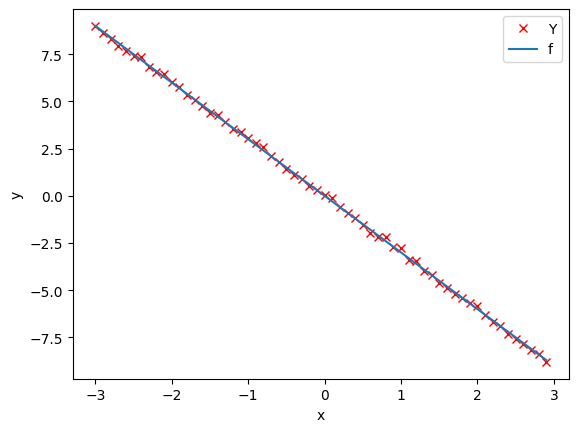

In [30]:
# Plot the data points

plt.plot(X.numpy(), Y.numpy(), 'rx', label = 'Y')

plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [31]:
def forward(x):
    return w * x

In [32]:
def criterion(yhat, y):
    return torch.mean((yhat - y) ** 2)

In [33]:
lr = 0.1
LOSS = []

In [34]:
w = torch.tensor(-10.0, requires_grad = True)

In [ ]:
gradient_plot = plot_diagram(X, Y, w, stop = 5)

In [38]:
# Define a function for train the model

def train_model(iter):
    for epoch in range (iter):
        
        # make the prediction as we learned in the last lab
        Yhat = forward(X)
        
        # calculate the iteration
        loss = criterion(Yhat,Y)
        
        # plot the diagram for us to have a better idea
        gradient_plot(Yhat, w, loss.item(), epoch)
        
        # store the loss into list
        LOSS.append(loss.item())
        
        # backward pass: compute gradient of the loss with respect to all the learnable parameters
        loss.backward()
        
        # updata parameters
        w.data = w.data - lr * w.grad.data
        
        # zero the gradients before running the backward pass
        w.grad.data.zero_()

In [39]:
# Give 4 iterations for training the model here.

train_model(4)

NameError: name 'gradient_plot' is not defined

In [ ]:
# Plot the loss for each iteration

plt.plot(LOSS)
plt.tight_layout()
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")